<a href="https://colab.research.google.com/github/ma850419/Various_scripts/blob/main/ayrclass6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
ee.Authenticate()
ee.Initialize(project='velvety-ring-328419')

In [2]:
# Tensorflow setup.
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
#imageROI =ee.FeatureCollection('users/mohamadawadlebanon/borderutm36n')
imageROI =ee.FeatureCollection('users/mohamadawadlebanon/Iranbordernew10')
#trainingPolys = ee.FeatureCollection('users/mohamadawadlebanon/fieldsamples_2019_36N')
#evalPolys=ee.FeatureCollection('users/mohamadawadlebanon/fieldsamples_2019_36N')
training = ee.FeatureCollection('users/mohamadawadlebanon/Iran_clipped_points')

In [ ]:
record_count = training.size().getInfo()
print(f"Number of records: {record_count}")

# Convert FeatureCollection to a list and print all features
features = training.toList(record_count)
for i in range(record_count):
    feature = ee.Feature(features.get(i))
    print(feature.getInfo())  # Prints full feature properties

In [4]:
import folium

# Initialize Earth Engine

# Use Sentinel-2 surface reflectance data.
s2sr = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')

# Cloud masking function for Sentinel-2.
def maskS2sr(image):
    qa = image.select('QA60')  # Sentinel-2 cloud mask band
    mask = qa.eq(0)  # Keep only pixels where QA60 is clear
    return image.updateMask(mask).divide(10000)  # Scale reflectance values

# Clip function
def clipimage(image):
    return image.clip(imageROI)

# Define Image ROI (Replace with a valid region)
#imageROI = ee.Geometry.Rectangle([35, 30, 40, 35])  # Example ROI

# Create a cloud-masked median composite for July 2019
image = s2sr.filterDate('2024-05-01', '2024-05-31').map(clipimage).map(maskS2sr).median()
print(image.getInfo())
# Use folium to visualize the imagery.
mapid = image.getMapId({'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3})  # RGB composite
map = folium.Map(location=[28, 53], zoom_start=6)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='Sentinel-2 Composite',
).add_to(map)

'''mapid = image.getMapId({'bands': ['B11'], 'min': 0, 'max': 0.3})  # Thermal (SWIR Band)
folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='SWIR Band (B11)',
).add_to(map)

map.add_child(folium.LayerControl())'''

# Display map
map


{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B6', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': 0, 'max': 6.553500175476074}, 'crs': 'EPSG:4326', 'crs_transform': [1,

In [ ]:
image_np = geemap.ee_to_numpy(image, imageROI, bands=['B4', 'B3', 'B2'], scale=55)  # 10m resolution


In [8]:
import geemap
import numpy as np

# Extract image bands
region = imageROI  # Define a bounding box (Iran region)

# Convert to NumPy with specified region
image_np = geemap.ee_to_numpy(image,imageROI, bands=['B4', 'B3', 'B2'], scale =30)

'''training_image = training.reduceToImage(
    properties=['class'],
    reducer=ee.Reducer.first()
)'''
samples_image = training.reduceToImage(['class'], ee.Reducer.mode())  # Convert points to raster
# Change 'class' to 'mode' to match the band name created by reduceToImage
samples_np = geemap.ee_to_numpy(samples_image, region=region, bands=['mode'], scale =30)  # Extract pixels

# Define region (Ensure it's bounded)

# Convert to NumPy
#samples_np = geemap.ee_to_numpy(training_image, region=region, scale=40)

In [ ]:
print(np.unique(samples_np))

In [ ]:
#image_np = np.expand_dims(image_np, axis=-1)  # Converts to (height, width, 1)
image_np = np.expand_dims(image_np, axis=0)  # Becomes (1, 1439, 1825, 3)
samples_np = np.expand_dims(samples_np, axis=0)  # Becomes (1, 1439, 1825, 1)

print(image_np.shape)
#print(image_np)  # Inspect sample values

print(samples_np.shape )

In [ ]:
new_height = image_np.shape[1] - (image_np.shape[1] % 2)  # Ensure divisible by 2
new_width = image_np.shape[2] - (image_np.shape[2] % 2)

image_np = image_np[:, :new_height, :new_width, :]  # Trim image size
samples_np = samples_np[:, :new_height, :new_width, :]  # Match target size
print(image_np.shape)
#print(image_np)  # Inspect sample values

print(samples_np.shape )

In [ ]:
print("Unique values in samples_np before encoding:", np.unique(samples_np))


In [9]:
# image_np = np.expand_dims(image_np, axis=-1)  # Converts to (height, width, 1)
#image_np = np.expand_dims(image_np, axis=0)  # Becomes (1, 1439, 1825, 3)
#samples_np = np.expand_dims(samples_np, axis=0)  # Becomes (1, 1439, 1825, 1)

#print(image_np.shape)
#print(image_np)  # Inspect sample values

#print(samples_np.shape )

# One-hot encode the target labels
# Subtract 1 from samples_np to make class indices 0-based

# One-hot encode the target labels
samples_one_hot = tf.keras.utils.to_categorical(samples_np, num_classes=21)

# Remove the extra dimension added by to_categorical if necessary
if samples_one_hot.ndim == 5 and samples_one_hot.shape[-2] == 1:
    samples_one_hot = np.squeeze(samples_one_hot, axis=-2)

# Convert to integer format
samples_one_hot = samples_one_hot.astype(int)

print("Updated shape:", samples_one_hot)
print("Unique values:", np.unique(samples_one_hot))  # Should contain only 0s and 1s

Updated shape: [[[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 ...

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]]]
Unique values: [0 1]


In [10]:
# Ensure samples_np has correct dimensions
print("samples_np shape:", samples_np.shape)  # Expected: (1, 1438, 1824)

# Check samples_one_hot dimensions
print("samples_one_hot shape:", samples_one_hot.shape)  # Expected: (1, 1438, 1824, 21)

# Create mask that matches the exact shape of samples_one_hot
mask = np.repeat(samples_np == 0, repeats=samples_one_hot.shape[-1], axis=-1)  # Shape: (1, 1438, 1824, 21)

# Apply mask to remove No Data pixels
samples_one_hot[mask] = 0

# Verify changes
print("Updated shape:", samples_one_hot.shape)
print("Unique values:", np.unique(samples_one_hot))  # Should contain only 0s and 1s


samples_np shape: (1377, 1397, 1)
samples_one_hot shape: (1377, 1397, 21)
Updated shape: (1377, 1397, 21)
Unique values: [0 1]


Filtered class distribution: [ 19   1   0   7 120   0   0   1   0   1   0   1  13   2   0 163   0   0
   1  18]


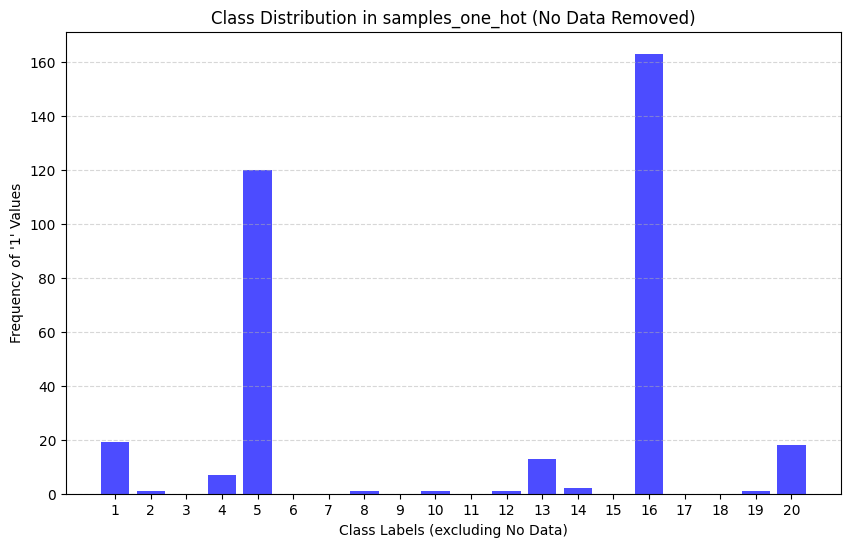

Class 1: 19 pixels
Class 2: 1 pixels
Class 3: 0 pixels
Class 4: 7 pixels
Class 5: 120 pixels
Class 6: 0 pixels
Class 7: 0 pixels
Class 8: 1 pixels
Class 9: 0 pixels
Class 10: 1 pixels
Class 11: 0 pixels
Class 12: 1 pixels
Class 13: 13 pixels
Class 14: 2 pixels
Class 15: 0 pixels
Class 16: 163 pixels
Class 17: 0 pixels
Class 18: 0 pixels
Class 19: 1 pixels
Class 20: 18 pixels


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sum pixel occurrences for each class (excluding spatial dimensions)
class_distribution = np.sum(samples_one_hot, axis=(0, 1))  # Shape: (21,)


# Remove No Data class (class 0)
class_distribution_filtered = class_distribution[1:]  # Excludes class 0
print("Filtered class distribution:", class_distribution_filtered)


# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), class_distribution_filtered, color='blue', alpha=0.7)
plt.xlabel("Class Labels (excluding No Data)")
plt.ylabel("Frequency of '1' Values")
plt.title("Class Distribution in samples_one_hot (No Data Removed)")
plt.xticks(range(1, 21))
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Print detailed class counts
for cls, count in enumerate(class_distribution_filtered, start=1):  # Start from class 1
    print(f"Class {cls}: {count} pixels")


In [12]:
image_np = np.expand_dims(image_np, axis=0)  # Becomes (1, 1439, 1825, 3)
samples_one_hot = np.expand_dims(samples_one_hot, axis=0)  # Becomes (1, 1439, 1825, 1)

print(image_np.shape)
#print(image_np)  # Inspect sample values

print(samples_one_hot.shape )

(1, 1377, 1397, 3)
(1, 1377, 1397, 21)


In [13]:
new_height = image_np.shape[1] - (image_np.shape[1] % 2)  # Ensure divisible by 2
new_width = image_np.shape[2] - (image_np.shape[2] % 2)

image_np = image_np[:, :new_height, :new_width, :]  # Trim image size
samples_one_hot = samples_one_hot[:, :new_height, :new_width, :]  # Match target size
print(image_np.shape)
#print(image_np)  # Inspect sample values

print(samples_one_hot.shape )

(1, 1376, 1396, 3)
(1, 1376, 1396, 21)


In [ ]:
print(samples_one_hot)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow import keras

# Define U-Net Model for 20-class classification
model = tf.keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(image_np.shape[1], image_np.shape[2], image_np.shape[3])),
    MaxPooling2D((2, 2)),
    UpSampling2D((2, 2)),
    Conv2D(20, (1, 1), activation='softmax', padding='same')  # Adjusted for multi-class classification
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (using GEE sample data)
model.fit(image_np, samples_one_hot[:,:,:,1:21], epochs=10, batch_size=32)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization
from tensorflow import keras
model = keras.Sequential([
    # Encoder
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(image_np.shape[1], image_np.shape[2], image_np.shape[3])),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    # Decoder
    UpSampling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    UpSampling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    UpSampling2D((2, 2)),
    Conv2D(20, (1, 1), activation='softmax', padding='same')  # Multi-class classification
])
samples_one_hot_modified= samples_one_hot[:,:1840,:1792,:]
#image_np_modified=image_np[:,:,:1800,:]
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(image_np, samples_one_hot_modified[:,:,:,1:21], epochs=20, batch_size=32)#, class_weight=class_weights)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.0210 - loss: 4.5829e-04
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0046 - loss: 4.9876e-04
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0337 - loss: 3.9940e-04
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0054 - loss: 3.8333e-04
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0270 - loss: 3.8593e-04
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0589 - loss: 3.8744e-04
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0431 - loss: 3.8570e-04
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0118 - loss: 3.8415e-04
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0125 - loss: 3.8250e-04
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0096 - loss: 3.8010e-04
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0091 - loss: 3.7782e-04
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0

In [15]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, Dropout, BatchNormalization
from tensorflow import keras
import tensorflow as tf
#import tensorflow_addons as tfa


model = keras.Sequential([
    # Encoder
    Conv2D(64, (3, 3), padding='same', input_shape=(image_np.shape[1], image_np.shape[2], image_np.shape[3])),
    BatchNormalization(),
    keras.layers.Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    keras.layers.Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    keras.layers.Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    keras.layers.Activation('relu'),
   #MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Decoder
    Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    BatchNormalization(),
    #Dropout(0.2),

    Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Conv2DTranspose(20, (1, 1), padding='same', activation='softmax')  # Multi-class classification
])

# Apply class weights1377, 1397
samples_one_hot_modified= samples_one_hot[:,:,:1392,1:21]
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  loss='categorical_crossentropy' , metrics=['accuracy'])#loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(image_np, samples_one_hot_modified,
          epochs=20, batch_size=16)
#model.fit(image_np, samples_one_hot[:,:,:,1:21], epochs=30, batch_size=32, class_weight=class_weights)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 49s 49s/step - accuracy: 0.1183 - loss: 7.1374e-04
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.2327 - loss: 6.7821e-04
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3035 - loss: 6.1077e-04
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3228 - loss: 5.8600e-04
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 0.3190 - loss: 5.7758e-04
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step - accuracy: 0.3105 - loss: 5.6942e-04
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step - accuracy: 0.3057 - loss: 5.6270e-04
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3035 - loss: 5.5738e-04
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2951 - loss: 5.5168e-04
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2853 - loss: 5.4845e-04
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2903 - loss: 5.4782e-04
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step

In [ ]:
print(image_np.shape)
#print(image_np)  # Inspect sample values

print(samples_one_hot.shape )
print("Image shape:", image_np.shape)
print("Labels shape:", samples_one_hot[:,:,:,1:21].shape)

In [16]:
predictions = model.predict(image_np)
#print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step


In [17]:
import numpy as np

# Get the band index with the highest value per pixel
class_predictions = np.argmax(predictions, axis=-1)  # Shape: (1438, 1824)

# Adjust indices to match bands 1-20 (instead of 0-19)
class_predictions += 1

# Verify results
print("Updated shape:", class_predictions.shape)  # Should be (1438, 1824)
print("Unique classes:", np.unique(class_predictions))  # Should contain values [1, 2, ..., 20]


Updated shape: (1, 1376, 1392)
Unique classes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20]


In [19]:
import numpy as np

# Convert (1, 1848, 1800) to (1848, 1800, 1)
class_predictions_reshaped = np.reshape(class_predictions, (1376, 1392, 1))

# Alternatively, use np.expand_dims
class_predictions_reshaped = np.expand_dims(class_predictions[0], axis=-1)

print("New shape:", class_predictions_reshaped.shape)  # Should be (1848, 1800, 1)


New shape: (1376, 1392, 1)


In [22]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 103.3 MB/s eta 0:00:00


In [23]:
viz_params = {
    'min': 1,
    'max': 20,
    'palette': [
        'red', 'yellow', 'green', 'blue', 'purple', 'orange', 'brown', 'cyan', 'pink',
        'magenta', 'lime', 'gray', 'black', 'white', 'gold', 'navy', 'teal', 'maroon',
        'turquoise', 'violet'
    ]
}


In [26]:
import rasterio
import numpy as np
from rasterio.transform import from_bounds  # Use this to dynamically set bounds

# Assuming `imageROI` is an Earth Engine geometry with defined bounds
#west, south, east, north = imageROI.bounds().coordinates().getInfo()[0][0] + imageROI.bounds().coordinates().getInfo()[0][2]
coords = imageROI.bounds().coordinates().getInfo()[0]
west, south = coords[0]
east, north = coords[2]
# Extract image size
height, width = class_predictions_reshaped.shape[:2]
pixel_size_x = (east - west) / width
pixel_size_y = (north - south) / height

# Define geospatial transform based on real bounds
transform = from_bounds(west, south, east, north, width, height)

# Convert NumPy array to uint8 for compatibility
class_predictions_tif = class_predictions_reshaped.astype(np.uint8)

# Save as GeoTIFF with extracted boundary limits
with rasterio.open(
    "class_predictions.tif", "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype="uint8",
    crs="EPSG:32639",  # UTM Zone 39N, WGS84
    transform=transform,
) as dst:
    dst.write(class_predictions_tif[:, :, 0], 1)

# Print extracted boundary limits
print(f"Extracted Boundaries: West={west}, East={east}, South={south}, North={north}")



Extracted Boundaries: West=53.58955886218086, East=53.96584054686898, South=28.564564063459862, North=28.935395416873806


In [27]:
import folium
import rasterio

# Load GeoTIFF and extract bounds
with rasterio.open("class_predictions.tif") as dataset:
    bounds = [[dataset.bounds.bottom, dataset.bounds.left], [dataset.bounds.top, dataset.bounds.right]]

# Create interactive map
m = folium.Map(location=[(bounds[1][1] + bounds[0][1]) / 2, (bounds[1][0] + bounds[0][0]) / 2], zoom_start=6)

# Overlay the image
folium.raster_layers.ImageOverlay(
    image="class_predictions.tif",
    bounds=bounds,
    opacity=0.7
).add_to(m)

m.save("map.html")
m